# 1. Imports

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [2]:
gpt_results = pd.read_excel('Validation_Results/validation_labels_final_comments_40minift.xlsx')
gpt_results = gpt_results[['speech_content', 'speech_id_long', 'polarizing', 'polarizing_40minift']]
gpt_results.head()

,speech_content,speech_id_long,polarizing,polarizing_40minift
0,Seit der Rede des Bundeskanzlers ist das Wort ...,20_69_11004705_16,0,1
1,Aus diesem Grund begrüßen wir ausdrücklich die...,20_25_11005049_1,0,0
2,"Das Zweite, was Sie ansprechen, sind Veränderu...",20_90_999990119_2,0,0
3,"Ich bin aber der Überzeugung, dass jemand, der...",20_73_11004342_3,0,0
4,"also zum Beispiel die Geschlechterforschung, d...",20_114_11004041_3,0,0


In [3]:
llama_results = pd.read_csv('Validation_Results/validation_llama_out.csv')
# drop unnamed colums
llama_results = llama_results.loc[:, ~llama_results.columns.str.contains('^Unnamed')]
# merge the polarizing label from gpt results by index
llama_results = llama_results.merge(gpt_results[['polarizing']], left_index=True, right_index=True)
print(len(llama_results))
llama_results.head()

2257


,id,cleaned_text,polarizing
0,20_69_11004705_16,0,0
1,20_25_11005049_1,0,0
2,20_90_999990119_2,0,0
3,20_73_11004342_3,0,0
4,20_114_11004041_3,0,0


In [4]:
bert_results = pd.read_excel('Validation_Results/validation_predictions_optimized_optuna_logitsloss_final.xlsx')
bert_results.head()

,speech_content,speech_id_long,polarizing,populist,extremist,neutral,Unnamed: 6,source_file,Raus/Umstritten,Kommenrar,predicted_polarizing
0,Seit der Rede des Bundeskanzlers ist das Wort ...,20_69_11004705_16,0,0,0,1,1,silja_05manual_pre_labeling_1610_validation_fi...,NaN,NaN,0
1,Aus diesem Grund begrüßen wir ausdrücklich die...,20_25_11005049_1,0,0,0,1,1,silja_05manual_pre_labeling_1610_validation_fi...,NaN,NaN,0
2,"Das Zweite, was Sie ansprechen, sind Veränderu...",20_90_999990119_2,0,0,0,1,1,silja_05manual_pre_labeling_1610_validation_fi...,NaN,NaN,0
3,"Ich bin aber der Überzeugung, dass jemand, der...",20_73_11004342_3,0,0,0,1,1,silja_05manual_pre_labeling_1610_validation_fi...,NaN,NaN,0
4,"also zum Beispiel die Geschlechterforschung, d...",20_114_11004041_3,0,0,0,1,1,silja_05manual_pre_labeling_1610_validation_fi...,NaN,NaN,0


# 2. Performance per Model

In [5]:
label_name= 'GPT'

accuracy = accuracy_score(gpt_results['polarizing'], gpt_results['polarizing_40minift'])
precision, recall, f1, _ = precision_recall_fscore_support(gpt_results['polarizing'], gpt_results['polarizing_40minift'], average='binary', zero_division=0)
class_report = classification_report(gpt_results['polarizing'], gpt_results['polarizing_40minift'], zero_division=0, digits=4)

print(f"{label_name} - Accuracy: {accuracy:.4f}")
print(f"{label_name} - Precision: {precision:.4f}")
print(f"{label_name} - Recall: {recall:.4f}")
print(f"{label_name} - F1-Score: {f1:.4f}")
print(f"\n{label_name} - Classification Report:\n{class_report}")

GPT - Accuracy: 0.9521
GPT - Precision: 0.6993
GPT - Recall: 0.9304
GPT - F1-Score: 0.7985

GPT - Classification Report:
              precision    recall  f1-score   support

           0     0.9918    0.9546    0.9729      2027
           1     0.6993    0.9304    0.7985       230

    accuracy                         0.9521      2257
   macro avg     0.8456    0.9425    0.8857      2257
weighted avg     0.9620    0.9521    0.9551      2257



In [6]:
label_name= 'LLama'

accuracy = accuracy_score(llama_results['polarizing'], llama_results['cleaned_text'])
precision, recall, f1, _ = precision_recall_fscore_support(llama_results['polarizing'], llama_results['cleaned_text'], average='binary', zero_division=0)
class_report = classification_report(llama_results['polarizing'], llama_results['cleaned_text'], zero_division=0, digits=4)

print(f"{label_name} - Accuracy: {accuracy:.4f}")
print(f"{label_name} - Precision: {precision:.4f}")
print(f"{label_name} - Recall: {recall:.4f}")
print(f"{label_name} - F1-Score: {f1:.4f}")
print(f"\n{label_name} - Classification Report:\n{class_report}")

LLama - Accuracy: 0.9397
LLama - Precision: 0.6546
LLama - Recall: 0.8652
LLama - F1-Score: 0.7453

LLama - Classification Report:
              precision    recall  f1-score   support

           0     0.9841    0.9482    0.9658      2027
           1     0.6546    0.8652    0.7453       230

    accuracy                         0.9397      2257
   macro avg     0.8194    0.9067    0.8556      2257
weighted avg     0.9505    0.9397    0.9434      2257



In [7]:
label_name= 'BERT'

accuracy = accuracy_score(bert_results['polarizing'], bert_results['predicted_polarizing'])
precision, recall, f1, _ = precision_recall_fscore_support(bert_results['polarizing'], bert_results['predicted_polarizing'], average='binary', zero_division=0)
class_report = classification_report(bert_results['polarizing'], bert_results['predicted_polarizing'], zero_division=0, digits=4)

print(f"{label_name} - Accuracy: {accuracy:.4f}")
print(f"{label_name} - Precision: {precision:.4f}")
print(f"{label_name} - Recall: {recall:.4f}")
print(f"{label_name} - F1-Score: {f1:.4f}")
print(f"\n{label_name} - Classification Report:\n{class_report}")

BERT - Accuracy: 0.9433
BERT - Precision: 0.6932
BERT - Recall: 0.7957
BERT - F1-Score: 0.7409

BERT - Classification Report:
              precision    recall  f1-score   support

           0     0.9764    0.9600    0.9682      2027
           1     0.6932    0.7957    0.7409       230

    accuracy                         0.9433      2257
   macro avg     0.8348    0.8778    0.8545      2257
weighted avg     0.9476    0.9433    0.9450      2257



# 3. Merge Results

In [8]:
merged_results = pd.merge(gpt_results, llama_results[['id', 'cleaned_text']], left_index=True, right_index=True)
merged_results = pd.merge(merged_results, bert_results[['predicted_polarizing']],left_index=True, right_index=True)
# drop id column
merged_results.drop(columns=['id'], inplace=True)
merged_results.rename(columns={'predicted_polarizing': 'bert', 'cleaned_text': 'llama', 'polarizing_40minift':'gpt'}, inplace=True)
print(len(merged_results))
merged_results.head()

2257


,speech_content,speech_id_long,polarizing,gpt,llama,bert
0,Seit der Rede des Bundeskanzlers ist das Wort ...,20_69_11004705_16,0,1,0,0
1,Aus diesem Grund begrüßen wir ausdrücklich die...,20_25_11005049_1,0,0,0,0
2,"Das Zweite, was Sie ansprechen, sind Veränderu...",20_90_999990119_2,0,0,0,0
3,"Ich bin aber der Überzeugung, dass jemand, der...",20_73_11004342_3,0,0,0,0
4,"also zum Beispiel die Geschlechterforschung, d...",20_114_11004041_3,0,0,0,0


In [23]:
merged_results['polarizing3']= (merged_results['gpt']+merged_results['llama']+merged_results['bert'])==3
merged_results['polarizing2']= (merged_results['gpt']+merged_results['llama']+merged_results['bert'])>=2
merged_results['polarizing_gpt_llama']= (merged_results['gpt']+merged_results['llama'])==2
merged_results['polarizing_gpt_bert']= (merged_results['gpt']+merged_results['bert'])==2
merged_results['polarizing_llama_bert']= (merged_results['llama']+merged_results['bert'])==2

#convert to binary
merged_results['polarizing3'] = merged_results['polarizing3'].astype(int)
merged_results['polarizing2'] = merged_results['polarizing2'].astype(int)
merged_results['polarizing_gpt_llama'] = merged_results['polarizing_gpt_llama'].astype(int)
merged_results['polarizing_gpt_bert'] = merged_results['polarizing_gpt_bert'].astype(int)
merged_results['polarizing_llama_bert'] = merged_results['polarizing_llama_bert'].astype(int)
merged_results.head()

,speech_content,speech_id_long,polarizing,gpt,llama,bert,polarizing3,polarizing2,polarizing_gpt_llama,polarizing_gpt_bert,polarizing_llama_bert
0,Seit der Rede des Bundeskanzlers ist das Wort ...,20_69_11004705_16,0,1,0,0,0,0,0,0,0
1,Aus diesem Grund begrüßen wir ausdrücklich die...,20_25_11005049_1,0,0,0,0,0,0,0,0,0
2,"Das Zweite, was Sie ansprechen, sind Veränderu...",20_90_999990119_2,0,0,0,0,0,0,0,0,0
3,"Ich bin aber der Überzeugung, dass jemand, der...",20_73_11004342_3,0,0,0,0,0,0,0,0,0
4,"also zum Beispiel die Geschlechterforschung, d...",20_114_11004041_3,0,0,0,0,0,0,0,0,0


In [21]:
# calculate percentages of polarizing speeches for each column
polarizing = merged_results['polarizing'].sum()/merged_results['polarizing'].count()
gpt_polarizing = merged_results['gpt'].sum()/merged_results['gpt'].count()
llama_polarizing = merged_results['llama'].sum()/merged_results['llama'].count()
bert_polarizing = merged_results['bert'].sum()/merged_results['bert'].count()
polarizing3 = merged_results['polarizing3'].sum()/merged_results['polarizing3'].count()
polarizing2 = merged_results['polarizing2'].sum()/merged_results['polarizing2'].count()

# print results
print(f"Percentage of polarizing speeches: {polarizing:.4f}")
print(f"Percentage of polarizing speeches in GPT: {gpt_polarizing:.4f}")
print(f"Percentage of polarizing speeches in LLama: {llama_polarizing:.4f}")
print(f"Percentage of polarizing speeches in BERT: {bert_polarizing:.4f}")
print(f"Percentage of polarizing speeches in all 3: {polarizing3:.4f}")
print(f"Percentage of polarizing speeches in at least 2: {polarizing2:.4f}")


Percentage of polarizing speeches: 0.1019
Percentage of polarizing speeches in GPT: 0.1356
Percentage of polarizing speeches in LLama: 0.1347
Percentage of polarizing speeches in BERT: 0.1170
Percentage of polarizing speeches in all 3: 0.0873
Percentage of polarizing speeches in at least 2: 0.1205


In [11]:
# export merged results as excel
merged_results.to_excel('Validation_Results/merged_results.xlsx', index=False)

# 4. Aggregated Model Performance

In [12]:
label_name= 'All models agree'

accuracy = accuracy_score(merged_results['polarizing'], merged_results['polarizing3'])
precision, recall, f1, _ = precision_recall_fscore_support(merged_results['polarizing'], merged_results['polarizing3'], average='binary', zero_division=0)
class_report = classification_report(merged_results['polarizing'], merged_results['polarizing3'], zero_division=0, digits=4)

print(f"{label_name} - Accuracy: {accuracy:.4f}")
print(f"{label_name} - Precision: {precision:.4f}")
print(f"{label_name} - Recall: {recall:.4f}")
print(f"{label_name} - F1-Score: {f1:.4f}")
print(f"\n{label_name} - Classification Report:\n{class_report}")

All models agree - Accuracy: 0.9579
All models agree - Precision: 0.8426
All models agree - Recall: 0.7217
All models agree - F1-Score: 0.7775

All models agree - Classification Report:
              precision    recall  f1-score   support

           0     0.9689    0.9847    0.9768      2027
           1     0.8426    0.7217    0.7775       230

    accuracy                         0.9579      2257
   macro avg     0.9058    0.8532    0.8771      2257
weighted avg     0.9561    0.9579    0.9565      2257



In [13]:
label_name= 'All Models (2/3)'

accuracy = accuracy_score(merged_results['polarizing'], merged_results['polarizing2'])
precision, recall, f1, _ = precision_recall_fscore_support(merged_results['polarizing'], merged_results['polarizing2'], average='binary', zero_division=0)
class_report = classification_report(merged_results['polarizing'], merged_results['polarizing2'], zero_division=0, digits=4)


print(f"{label_name} - Accuracy: {accuracy:.4f}")
print(f"{label_name} - Precision: {precision:.4f}")
print(f"{label_name} - Recall: {recall:.4f}")
print(f"{label_name} - F1-Score: {f1:.4f}")
print(f"\n{label_name} - Classification Report:\n{class_report}")

All Models (2/3) - Accuracy: 0.9610
All Models (2/3) - Precision: 0.7610
All Models (2/3) - Recall: 0.9000
All Models (2/3) - F1-Score: 0.8247

All Models (2/3) - Classification Report:
              precision    recall  f1-score   support

           0     0.9884    0.9679    0.9781      2027
           1     0.7610    0.9000    0.8247       230

    accuracy                         0.9610      2257
   macro avg     0.8747    0.9340    0.9014      2257
weighted avg     0.9652    0.9610    0.9624      2257



In [19]:
label_name= 'GPT LLAMA'

accuracy = accuracy_score(merged_results['polarizing'], merged_results['polarizing_gpt_llama'])
precision, recall, f1, _ = precision_recall_fscore_support(merged_results['polarizing'], merged_results['polarizing_gpt_llama'], average='binary', zero_division=0)
class_report = classification_report(merged_results['polarizing'], merged_results['polarizing_gpt_llama'], zero_division=0, digits=4)

print(f"{label_name} - Accuracy: {accuracy:.4f}")
print(f"{label_name} - Precision: {precision:.4f}")
print(f"{label_name} - Recall: {recall:.4f}")
print(f"{label_name} - F1-Score: {f1:.4f}")
print(f"\n{label_name} - Classification Report:\n{class_report}")

GPT LLAMA - Accuracy: 0.9619
GPT LLAMA - Precision: 0.7975
GPT LLAMA - Recall: 0.8391
GPT LLAMA - F1-Score: 0.8178

GPT LLAMA - Classification Report:
              precision    recall  f1-score   support

           0     0.9816    0.9758    0.9787      2027
           1     0.7975    0.8391    0.8178       230

    accuracy                         0.9619      2257
   macro avg     0.8896    0.9075    0.8983      2257
weighted avg     0.9629    0.9619    0.9623      2257



In [24]:
label_name= 'GPT BERT'

accuracy = accuracy_score(merged_results['polarizing'], merged_results['polarizing_gpt_bert'])
precision, recall, f1, _ = precision_recall_fscore_support(merged_results['polarizing'], merged_results['polarizing_gpt_bert'], average='binary', zero_division=0)
class_report = classification_report(merged_results['polarizing'], merged_results['polarizing_gpt_bert'], zero_division=0, digits=4)

print(f"{label_name} - Accuracy: {accuracy:.4f}")
print(f"{label_name} - Precision: {precision:.4f}")
print(f"{label_name} - Recall: {recall:.4f}")

print(f"{label_name} - F1-Score: {f1:.4f}")
print(f"\n{label_name} - Classification Report:\n{class_report}")


GPT BERT - Accuracy: 0.9592
GPT BERT - Precision: 0.8136
GPT BERT - Recall: 0.7783
GPT BERT - F1-Score: 0.7956

GPT BERT - Classification Report:
              precision    recall  f1-score   support

           0     0.9750    0.9798    0.9774      2027
           1     0.8136    0.7783    0.7956       230

    accuracy                         0.9592      2257
   macro avg     0.8943    0.8790    0.8865      2257
weighted avg     0.9585    0.9592    0.9588      2257



In [25]:
label_name= 'LLama BERT'

accuracy = accuracy_score(merged_results['polarizing'], merged_results['polarizing_llama_bert'])
precision, recall, f1, _ = precision_recall_fscore_support(merged_results['polarizing'], merged_results['polarizing_llama_bert'], average='binary', zero_division=0)
class_report = classification_report(merged_results['polarizing'], merged_results['polarizing_llama_bert'], zero_division=0, digits=4)

print(f"{label_name} - Accuracy: {accuracy:.4f}")
print(f"{label_name} - Precision: {precision:.4f}")
print(f"{label_name} - Recall: {recall:.4f}")
print(f"{label_name} - F1-Score: {f1:.4f}")
print(f"\n{label_name} - Classification Report:\n{class_report}")


LLama BERT - Accuracy: 0.9557
LLama BERT - Precision: 0.8186
LLama BERT - Recall: 0.7261
LLama BERT - F1-Score: 0.7696

LLama BERT - Classification Report:
              precision    recall  f1-score   support

           0     0.9693    0.9817    0.9755      2027
           1     0.8186    0.7261    0.7696       230

    accuracy                         0.9557      2257
   macro avg     0.8940    0.8539    0.8725      2257
weighted avg     0.9540    0.9557    0.9545      2257



# 5. Confusion Matrix

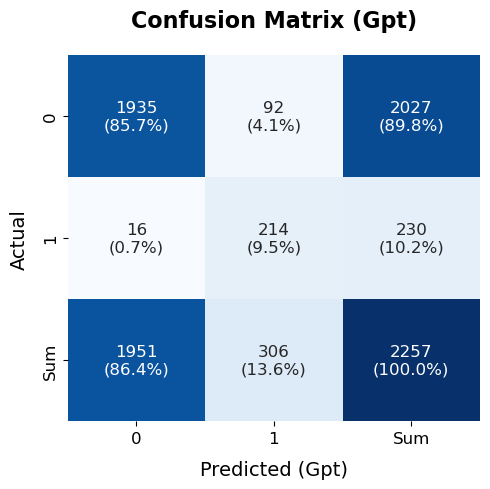

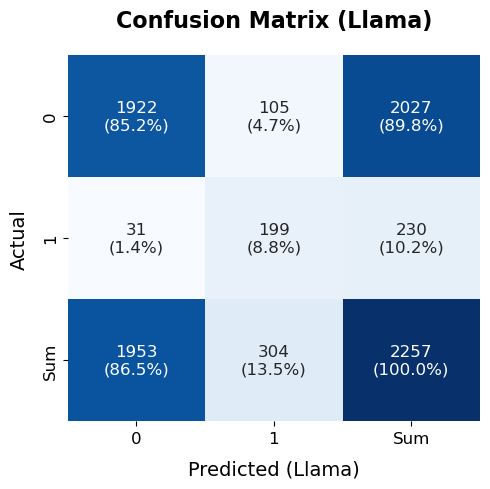

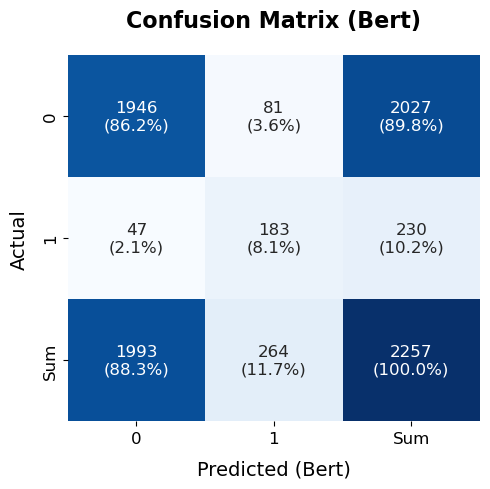

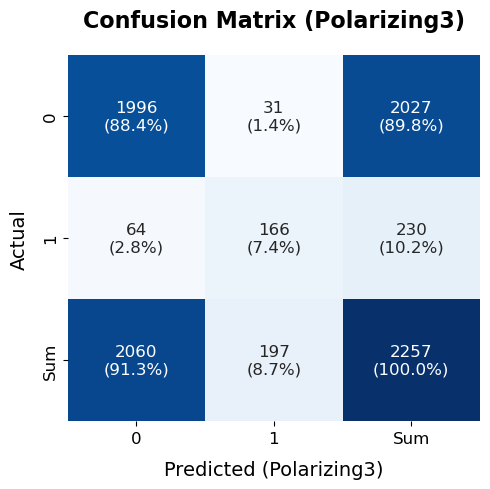

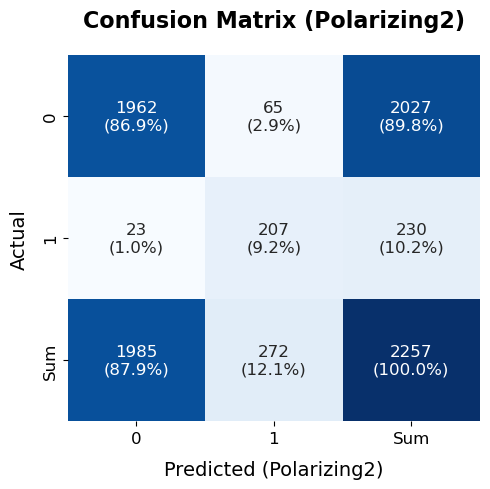

In [14]:
# Function to create a confusion matrix with percentages formatted like the example
def plot_confusion_matrix_with_percentages(actual, predicted, model_name):
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(actual, predicted)
    
    # Calculate the percentages
    conf_matrix_percent = conf_matrix / conf_matrix.sum() * 100
    
    # Add totals
    totals_row = conf_matrix.sum(axis=1).reshape(-1, 1)  # Row totals
    totals_column = conf_matrix.sum(axis=0).reshape(1, -1)  # Column totals
    overall_total = conf_matrix.sum()  # Grand total
    
    # Add row and column totals to the confusion matrix
    conf_matrix_with_totals = np.hstack((conf_matrix, totals_row))  # Append row totals
    totals_column_with_grand = np.append(totals_column, overall_total).reshape(1, -1)  # Add grand total
    conf_matrix_with_totals = np.vstack((conf_matrix_with_totals, totals_column_with_grand))  # Append column totals

    # Convert percentages to match the extended matrix
    conf_matrix_percent_with_totals = np.hstack((conf_matrix_percent, (totals_row / overall_total * 100)))
    totals_column_percent = np.append(totals_column / overall_total * 100, 100).reshape(1, -1)
    conf_matrix_percent_with_totals = np.vstack((conf_matrix_percent_with_totals, totals_column_percent))

    # Combine counts and percentages into formatted strings for each cell
    combined_matrix = np.empty_like(conf_matrix_with_totals, dtype=object)
    for i in range(conf_matrix_with_totals.shape[0]):
        for j in range(conf_matrix_with_totals.shape[1]):
            count = conf_matrix_with_totals[i, j]
            percent = conf_matrix_percent_with_totals[i, j]
            if i == conf_matrix_with_totals.shape[0] - 1 or j == conf_matrix_with_totals.shape[1] - 1:
                # Totals row and column: Only show counts
                combined_matrix[i, j] = f"{int(count)}\n({percent:.1f}%)"
            else:
                # Regular cells: Show counts and percentages
                combined_matrix[i, j] = f"{int(count)}\n({percent:.1f}%)"

    # Generate the labels
    labels = sorted(pd.unique(actual))
    labels_with_total = labels + ['Sum']

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(5, 5))
    sns.heatmap(
        conf_matrix_with_totals, annot=combined_matrix, fmt="", cmap="Blues", cbar=False,
        xticklabels=labels_with_total, yticklabels=labels_with_total, annot_kws={"size": 12}
    )
    plt.title(f"Confusion Matrix ({model_name})", fontsize=16, weight="bold", pad=20)
    plt.xlabel(f"Predicted ({model_name})", fontsize=14, labelpad=10)
    plt.ylabel("Actual", fontsize=14, labelpad=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig(f'Validation_Results/confusion_matrix_{model_name}.png')

    plt.show()

# Apply the function for each model
for model in ['gpt', 'llama', 'bert', 'polarizing3', 'polarizing2']:
    plot_confusion_matrix_with_percentages(merged_results['polarizing'], merged_results[model], model_name=model.capitalize())


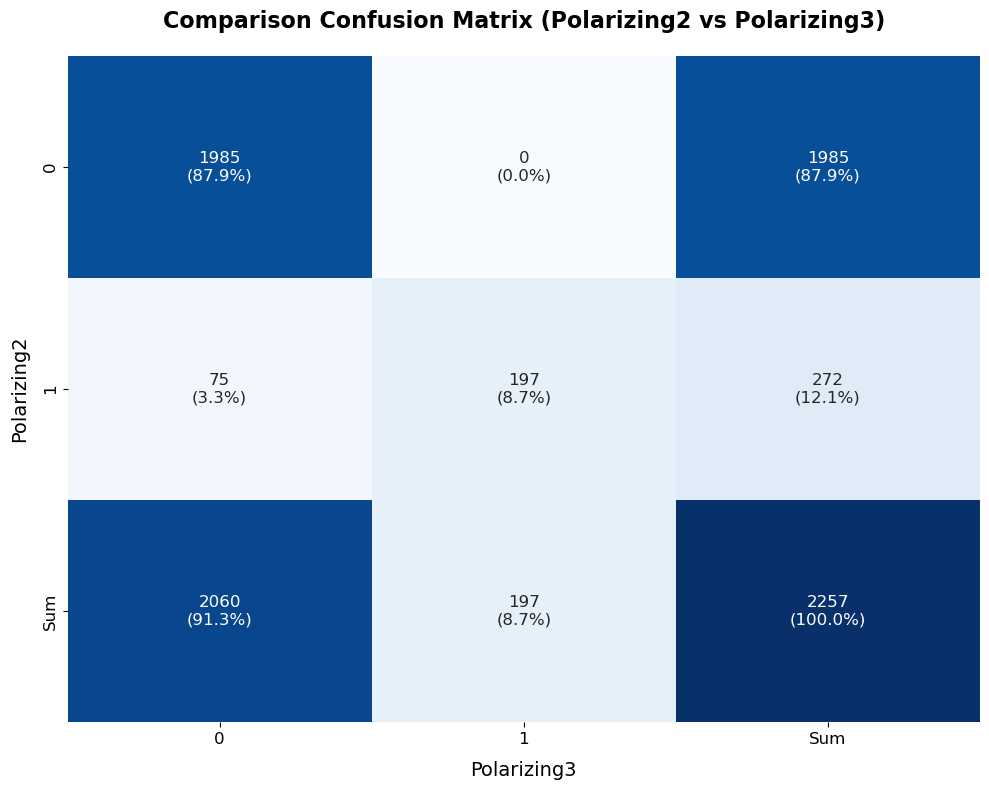

In [15]:

# Generate the confusion matrix
conf_matrix = confusion_matrix(merged_results['polarizing2'], merged_results['polarizing3'])

# Calculate the percentages
conf_matrix_percent = conf_matrix / conf_matrix.sum() * 100

# Add totals
totals_row = conf_matrix.sum(axis=1).reshape(-1, 1)  # Row totals
totals_column = conf_matrix.sum(axis=0).reshape(1, -1)  # Column totals
overall_total = conf_matrix.sum()  # Grand total

# Add row and column totals to the confusion matrix
conf_matrix_with_totals = np.hstack((conf_matrix, totals_row))  # Append row totals
totals_column_with_grand = np.append(totals_column, overall_total).reshape(1, -1)  # Add grand total
conf_matrix_with_totals = np.vstack((conf_matrix_with_totals, totals_column_with_grand))  # Append column totals

# Convert percentages to match the extended matrix
conf_matrix_percent_with_totals = np.hstack((conf_matrix_percent, (totals_row / overall_total * 100)))
totals_column_percent = np.append(totals_column / overall_total * 100, 100).reshape(1, -1)
conf_matrix_percent_with_totals = np.vstack((conf_matrix_percent_with_totals, totals_column_percent))

# Combine counts and percentages into formatted strings for each cell
combined_matrix = np.empty_like(conf_matrix_with_totals, dtype=object)
for i in range(conf_matrix_with_totals.shape[0]):
    for j in range(conf_matrix_with_totals.shape[1]):
        count = conf_matrix_with_totals[i, j]
        percent = conf_matrix_percent_with_totals[i, j]
        if i == conf_matrix_with_totals.shape[0] - 1 or j == conf_matrix_with_totals.shape[1] - 1:
            # Totals row and column: Only show counts
            combined_matrix[i, j] = f"{int(count)}\n({percent:.1f}%)"
        else:
            # Regular cells: Show counts and percentages
            combined_matrix[i, j] = f"{int(count)}\n({percent:.1f}%)"

# Generate the labels
labels = sorted(pd.unique(merged_results['polarizing2']))
labels_with_total = labels + ['Sum']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix_with_totals, annot=combined_matrix, fmt="", cmap="Blues", cbar=False,
    xticklabels=labels_with_total, yticklabels=labels_with_total, annot_kws={"size": 12}
)
plt.title("Comparison Confusion Matrix (Polarizing2 vs Polarizing3)", fontsize=16, weight="bold", pad=20)
plt.xlabel("Polarizing3", fontsize=14, labelpad=10)
plt.ylabel("Polarizing2", fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()
